<a href="https://colab.research.google.com/github/Anshuldogra001/Stock_Market_Capestone_Project/blob/main/Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip3 install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [46]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import yfinance as yf
import plotly.io as pio
pio.renderers.default = 'colab'
import numpy as np
np.random.seed(0)

In [47]:
Tesla=yf.Ticker("TSLA")

In [48]:
df=Tesla.history(period="max")

In [49]:
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3236 entries, 0 to 3235
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3236 non-null   datetime64[ns]
 1   Open          3236 non-null   float64       
 2   High          3236 non-null   float64       
 3   Low           3236 non-null   float64       
 4   Close         3236 non-null   float64       
 5   Volume        3236 non-null   int64         
 6   Dividends     3236 non-null   float64       
 7   Stock Splits  3236 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 202.4 KB


In [51]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,94914000,0.0,0.0


In [52]:
px.area(df, x="Date", y="Close")

In [53]:
px.line(df, x="Date", y="Close")

In [54]:
px.area(df, x="Date", y="Volume")

In [55]:
px.bar(df,y="Volume")

In [56]:
px.box(df,y="Close")

In [57]:
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [58]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

data  = requests.get(url).text

In [59]:
soup = BeautifulSoup(data, 'html5lib')

In [60]:
tesla_revenue = pd.DataFrame(columns=["Date","Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    Date = col[0].text
    Revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-60-caf972addd1f>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [61]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-61-2aef5327de36>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [62]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [63]:
tesla_revenue.tail(5)

,Date,Revenue
9,2013,2013
10,2012,413
11,2011,204
12,2010,117
13,2009,112


In [64]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [65]:
make_graph(df, tesla_revenue, 'Tesla')

In [66]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3231,2023-05-01,163.169998,163.279999,158.830002,161.830002,109015000,0.0,0.0
3232,2023-05-02,161.880005,165.490005,158.929993,160.309998,128259700,0.0,0.0
3233,2023-05-03,160.009995,165.000000,159.910004,160.610001,119728000,0.0,0.0
3234,2023-05-04,162.710007,162.949997,159.649994,161.199997,94914000,0.0,0.0


In [67]:
Columns=["Date","Close"]
ndf=pd.DataFrame(df,columns=Columns)

In [68]:
ndf

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [69]:
prophet_df=ndf.rename(columns={"Date":"ds", "Close":"y"})
prophet_df

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
3231,2023-05-01,161.830002
3232,2023-05-02,160.309998
3233,2023-05-03,160.610001
3234,2023-05-04,161.199997


In [70]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjt64cj5g/4tpu6bai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjt64cj5g/obphgsbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76855', 'data', 'file=/tmp/tmpjt64cj5g/4tpu6bai.json', 'init=/tmp/tmpjt64cj5g/obphgsbt.json', 'output', 'file=/tmp/tmpjt64cj5g/prophet_model00liqxv0/prophet_model-20230505151708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:17:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [71]:
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [72]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-06-29,-1.088425,-45.303421,30.812324,-1.088425,-1.088425,-5.151629,-5.151629,-5.151629,-0.525506,-0.525506,-0.525506,-4.626123,-4.626123,-4.626123,0.0,0.0,0.0,-6.240055
1,2010-06-30,-1.079444,-46.574986,35.658475,-1.079444,-1.079444,-4.933603,-4.933603,-4.933603,-0.497206,-0.497206,-0.497206,-4.436396,-4.436396,-4.436396,0.0,0.0,0.0,-6.013047
2,2010-07-01,-1.070464,-45.197629,33.832785,-1.070464,-1.070464,-4.978397,-4.978397,-4.978397,-0.731709,-0.731709,-0.731709,-4.246688,-4.246688,-4.246688,0.0,0.0,0.0,-6.048860
3,2010-07-02,-1.061483,-46.465865,32.819137,-1.061483,-1.061483,-5.001990,-5.001990,-5.001990,-0.942284,-0.942284,-0.942284,-4.059706,-4.059706,-4.059706,0.0,0.0,0.0,-6.063473
4,2010-07-06,-1.025560,-44.185477,33.850902,-1.025560,-1.025560,-3.912660,-3.912660,-3.912660,-0.525506,-0.525506,-0.525506,-3.387155,-3.387155,-3.387155,0.0,0.0,0.0,-4.938220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2023-05-31,253.823336,207.400149,284.567356,253.823336,253.823336,-6.441569,-6.441569,-6.441569,-0.497206,-0.497206,-0.497206,-5.944363,-5.944363,-5.944363,0.0,0.0,0.0,247.381767
3262,2023-06-01,253.865371,207.831773,288.060027,253.865371,253.865371,-6.671284,-6.671284,-6.671284,-0.731709,-0.731709,-0.731709,-5.939576,-5.939576,-5.939576,0.0,0.0,0.0,247.194086
3263,2023-06-02,253.907405,205.348070,286.973982,253.907405,253.907405,-6.879764,-6.879764,-6.879764,-0.942284,-0.942284,-0.942284,-5.937480,-5.937480,-5.937480,0.0,0.0,0.0,247.027641
3264,2023-06-03,253.949439,210.629051,291.284930,253.949439,253.949439,-4.597681,-4.597681,-4.597681,1.341373,1.341373,1.341373,-5.939053,-5.939053,-5.939053,0.0,0.0,0.0,249.351758


In [73]:
px.line(forcast, x="ds", y="yhat")

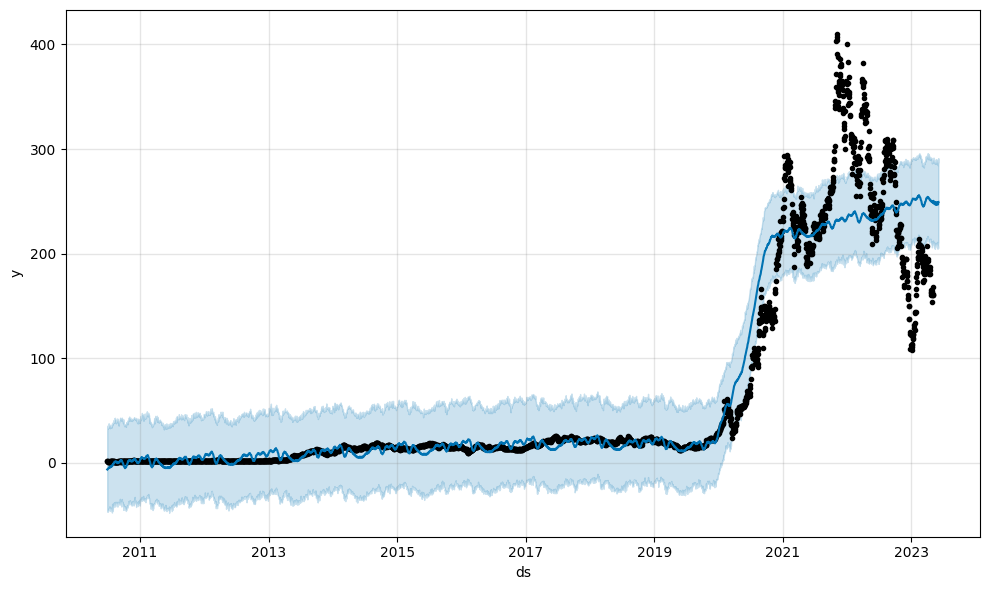

In [74]:
figure=m.plot(forcast, xlabel='ds', ylabel='y')

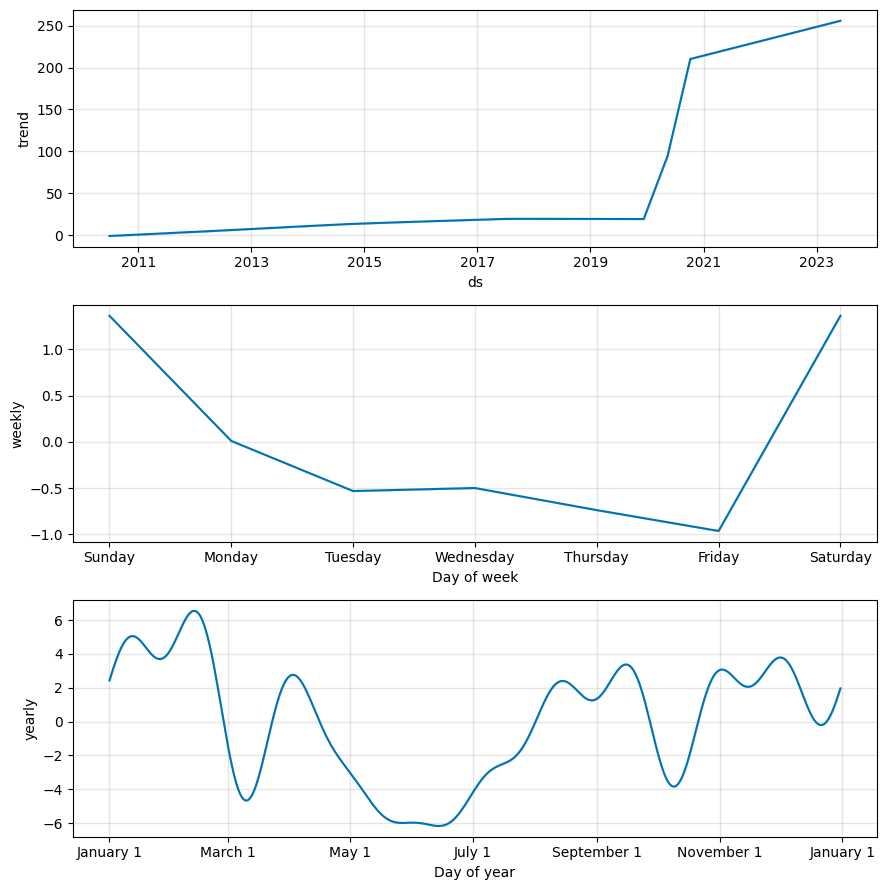

In [30]:
figure2=m.plot_components(forcast)

In [31]:
from google.colab import files
forcast.to_csv("forecast.csv")
files.download("forecast.csv")